## Fertilizer Recommendation

## Goal : the goal is to build a recommendation system for farmers to suggest the appropriate type of fertilizer for their crops. The recommendation should be based on various factors such as soil nutrient levels (phosphorus, potassium, nitrogen), soil type, crop type, temperature, humidity, moisture, and possibly other environmental factors.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn import tree
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')


file_path_1 = '/content/drive/My Drive/202101135_Lav/IE406_Project/fertilizer_recommendation.csv'
data = pd.read_csv(file_path_1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Soil Moisture    99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


## Data Processing

In [ ]:
#changing the column names
data.rename(columns={'Humidity ':'Humidity','Soil Type':'Soil_Type','Crop Type':'Crop_Type','Fertilizer Name':'Fertilizer'},inplace=True)

# Visualizing the Dataset
**Here, we are creating a horizontal bar plot to visualize the distribution of different types of fertilizers in the dataset. We first extract the unique labels and their counts, then create the plot using matplotlib. Finally, we label each bar with its count and display the plot. This helps us understand the distribution of fertilizer types in the dataset.**

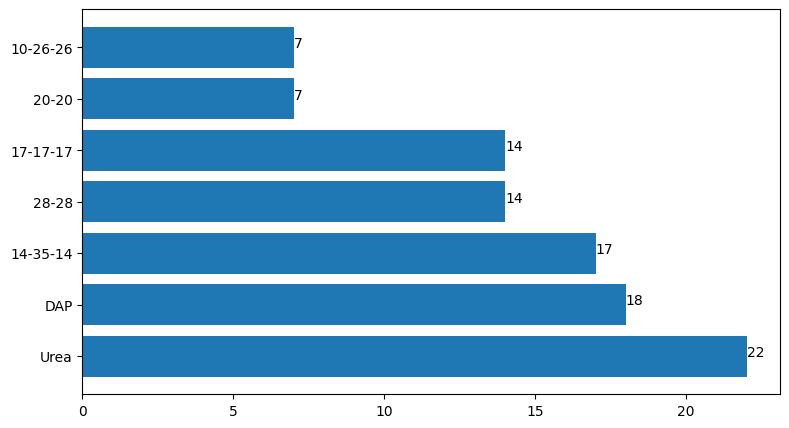

In [ ]:
labels = data["Fertilizer"].unique()
counts = list(data["Fertilizer"].value_counts())

plt.figure(figsize = (9,5))
plt.barh(labels, counts)

for index, value in enumerate(counts):
    plt.text(value, index,
             str(value))
plt.show()

## plot_cato(x):
**This function plots count plots for exploring categorical variables. It helps us understand the distribution of categories and their relationship with the output variable.**

In [ ]:
def plot_cato(x):
    fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5),tight_layout=True)
    axes[0].set_title('Count Plot')
    sns.countplot(x,ax=axes[0])
    axes[1].set_title('Relation with output variable')
    sns.countplot(x = x,hue = data.Fertilizer, ax=axes[1])

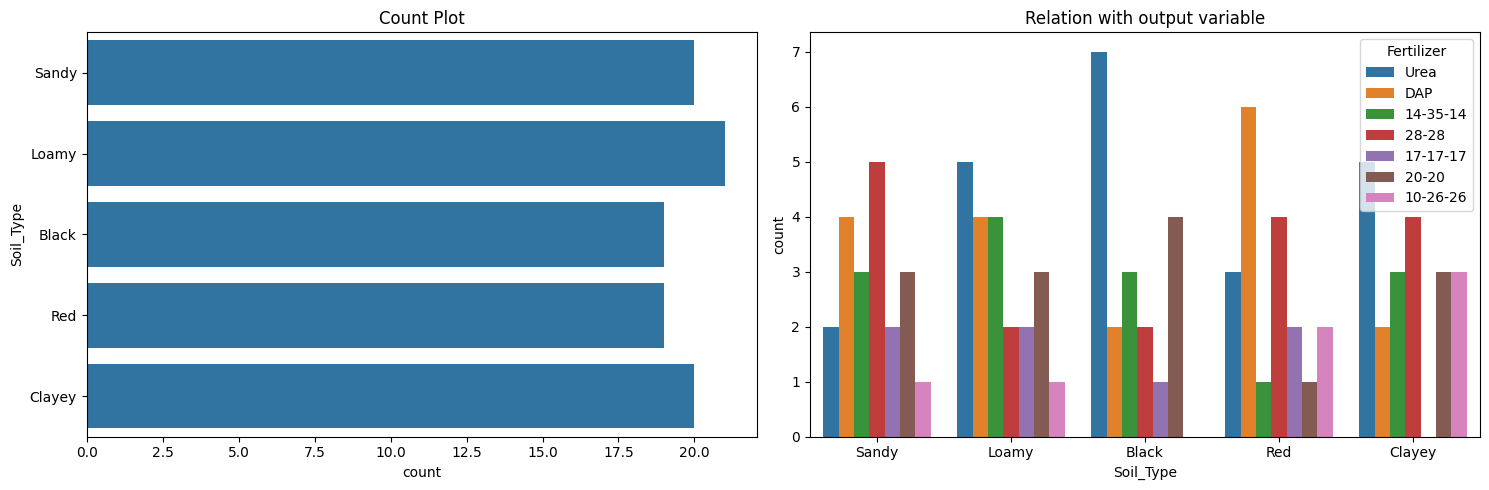

In [ ]:
#EDA - Soil_Type variable
plot_cato(data.Soil_Type)

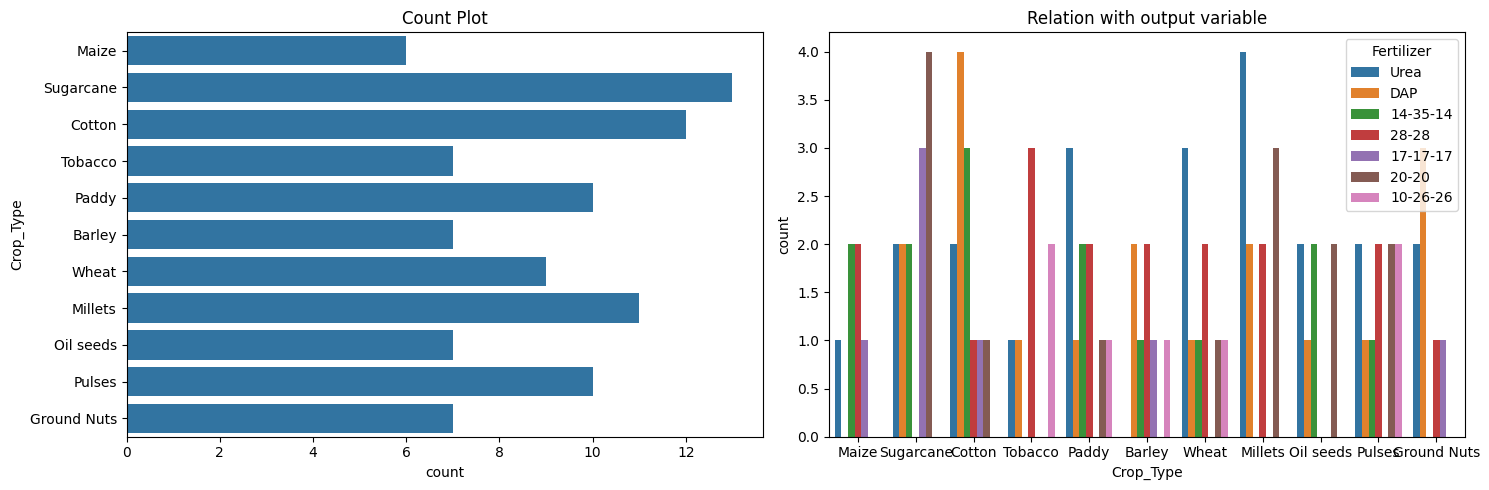

In [ ]:
#EDA - Crop_Type variable
plot_cato(data.Crop_Type)

# Label Encoding
**This process converts categorical values in the "Soil Type" variable into numerical labels, facilitating the use of this variable in machine learning algorithms that require numerical inputs. The DataFrame Soil_Type provides a mapping between the original soil types and their encoded numerical labels for reference.**

In [ ]:
#encoding Soil Type variable
encode_soil = LabelEncoder()

#fitting the label encoder
data.Soil_Type = encode_soil.fit_transform(data.Soil_Type)

#creating the DataFrame
Soil_Type = pd.DataFrame(zip(encode_soil.classes_,encode_soil.transform(encode_soil.classes_)),columns=['Original','Encoded'])
Soil_Type = Soil_Type.set_index('Original')
Soil_Type

,Encoded
Original,
Black,0
Clayey,1
Loamy,2
Red,3
Sandy,4


In [ ]:
#encoding Crop Type variable
encode_crop = LabelEncoder()

#fitting the label encoder
data.Crop_Type = encode_crop.fit_transform(data.Crop_Type)

#creating the DataFrame
Crop_Type = pd.DataFrame(zip(encode_crop.classes_,encode_crop.transform(encode_crop.classes_)),columns=['Original','Encoded'])
Crop_Type = Crop_Type.set_index('Original')
Crop_Type

,Encoded
Original,
Barley,0
Cotton,1
Ground Nuts,2
Maize,3
Millets,4
Oil seeds,5
Paddy,6
Pulses,7
Sugarcane,8


In [ ]:
#encoding Fertilizer variable
encode_ferti = LabelEncoder()

#fitting the label encoder
data.Fertilizer = encode_ferti.fit_transform(data.Fertilizer)

#creating the DataFrame
Fertilizer = pd.DataFrame(zip(encode_ferti.classes_,encode_ferti.transform(encode_ferti.classes_)),columns=['Original','Encoded'])
Fertilizer = Fertilizer.set_index('Original')
Fertilizer

,Encoded
Original,
10-26-26,0
14-35-14,1
17-17-17,2
20-20,3
28-28,4
DAP,5
Urea,6


**Splitting the Dataset into X and Y for categorize dependent and independent variables**

In [ ]:
x = data[data.columns[:-1]]
y = data[data.columns[-1]]


#splitting the data into train and test
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(x,y, test_size=0.2,random_state=1)

# Initializing empty lists to append all model's name and corresponding name
acc = []
model = []

## KNN Clasification

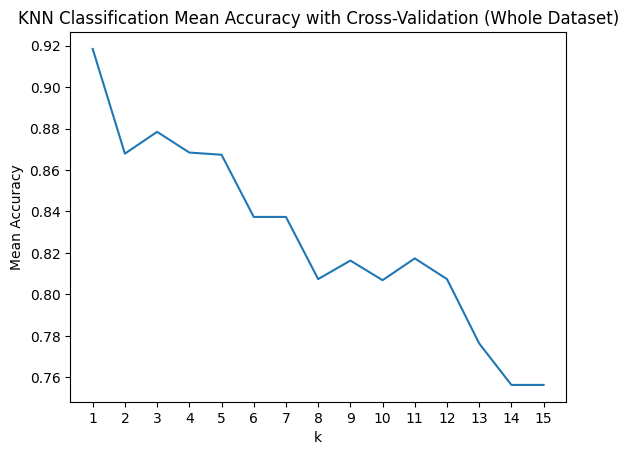

Best accuracy: 0.9184210526315789
Best k: 1
Overall Accuracy: 0.9184210526315789
Precision: 0.9904761904761905
Recall: 0.979591836734694
F1 Score: 0.9840848806366047


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score



# Define a range of k values to try
k_values = range(1,16)  # Try k from 1 to 30

# Initialize lists to store mean accuracies for each k
mean_accuracies = []
# Initialize variables to store max accuracy and corresponding k
max_accuracy = 0
best_k = 0
# Loop through each k value
for k in k_values:
    # Initialize KNN classifier with current k
    knn = KNeighborsClassifier(n_neighbors=k)

    # Perform k-fold cross-validation
    accuracies = cross_val_score(knn, x, y, cv=5)

    # Calculate mean accuracy
    mean_accuracy = np.mean(accuracies)
    mean_accuracies.append(mean_accuracy)

    # Check if current accuracy is higher than the maximum
    if mean_accuracy > max_accuracy:
        max_accuracy = mean_accuracy
        best_k = k

# Plot the mean accuracies
plt.plot(k_values, mean_accuracies)
plt.xlabel('k')
plt.ylabel('Mean Accuracy')
plt.title('KNN Classification Mean Accuracy with Cross-Validation (Whole Dataset)')
plt.xticks(k_values)
plt.show()


# Initialize KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x,y)

print("Best accuracy:", max_accuracy)
print("Best k:", best_k)

acc.append(max_accuracy)
model.append('KNN')

predicted_values = knn.predict(x)

# Calculate accuracy
accuracy = accuracy_score(y, predicted_values)

# Calculate precision
precision = precision_score(y, predicted_values, average='macro')

# Calculate recall
recall = recall_score(y, predicted_values, average='macro')

# Calculate F1 score
f1 = f1_score(y, predicted_values, average='macro')



print("Overall Accuracy:", max_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


## Decision Tree

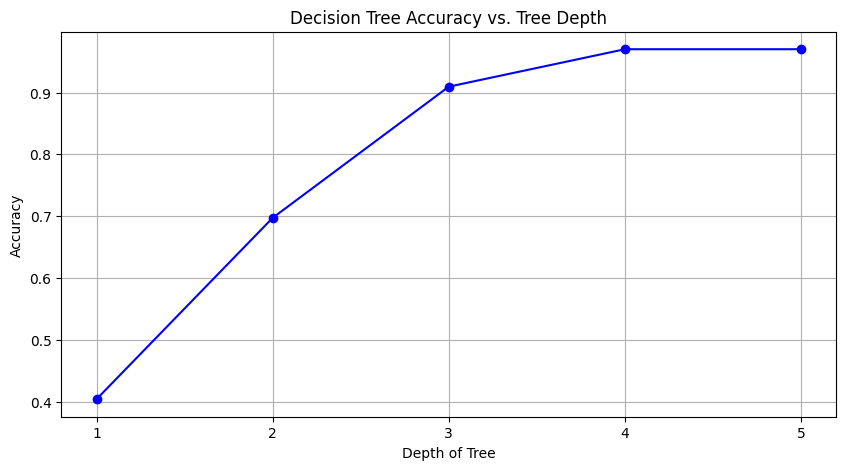

Overall Accuracy: 0.97
Precision: 0.6428571428571429
Recall: 0.7142857142857143
F1 Score: 0.6666666666666666


In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

depths = range(1,6)  # Testing depths from 1 to 5
accuracies = []

# Iterate over the specified range of tree depths
for depth in depths:
    # Create the Decision Tree model with the specified depth
    DecisionTree = DecisionTreeClassifier(criterion="entropy", random_state=2, max_depth=depth)

    # Perform cross-validation and calculate the mean score
    scores = cross_val_score(DecisionTree, x, y, cv=5)
    mean_score = np.mean(scores)
    accuracies.append(mean_score)

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(depths, accuracies, marker='o', linestyle='-', color='b')
plt.title('Decision Tree Accuracy vs. Tree Depth')
plt.xlabel('Depth of Tree')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(depths)  # Ensure all depth values are marked
plt.show()


DecisionTree = DecisionTreeClassifier(criterion="entropy", random_state=2, max_depth=6)
DecisionTree.fit(Xtrain,Ytrain)
predicted_values = DecisionTree.predict(Xtest)
scores = cross_val_score(DecisionTree, x, y, cv=5)
mean_score = np.mean(scores)


acc.append(mean_score)
model.append('Decision Tree')



# Calculate precision
precision = precision_score(Ytest, predicted_values, average='macro')

# Calculate recall
recall = recall_score(Ytest, predicted_values, average='macro')

# Calculate F1 score
f1 = f1_score(Ytest, predicted_values, average='macro')



print("Overall Accuracy:", mean_score)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


## <h1> Guassian Naive Bayes </h1>



In [ ]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
score = cross_val_score(NaiveBayes,x,y,cv=5)
mean_score = np.mean(score)

acc.append(mean_score)
model.append(NaiveBayes)

#calculate accuracy
accuracy = accuracy_score(Ytest, predicted_values)

# Calculate precision
precision = precision_score(Ytest, predicted_values, average='macro')

# Calculate recall
recall = recall_score(Ytest, predicted_values, average='macro')

# Calculate F1 score
f1 = f1_score(Ytest, predicted_values, average='macro')



print("Overall Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Overall Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


## <h1> Support Vector Machine (SVM) </h1>

SVM with linear kernel's Accuracy is: 0.975
SVM with poly kernel's Accuracy is: 0.9616666666666667
SVM with rbf kernel's Accuracy is: 0.35416666666666663
SVM with linear kernel's Accuracy: 0.975
SVM with poly kernel's Accuracy: 0.9616666666666667
SVM with rbf kernel's Accuracy: 0.35416666666666663

Overall Accuracy: 0.95
Precision: 0.9642857142857143
Recall: 0.9523809523809523
F1 Score: 0.9510204081632653




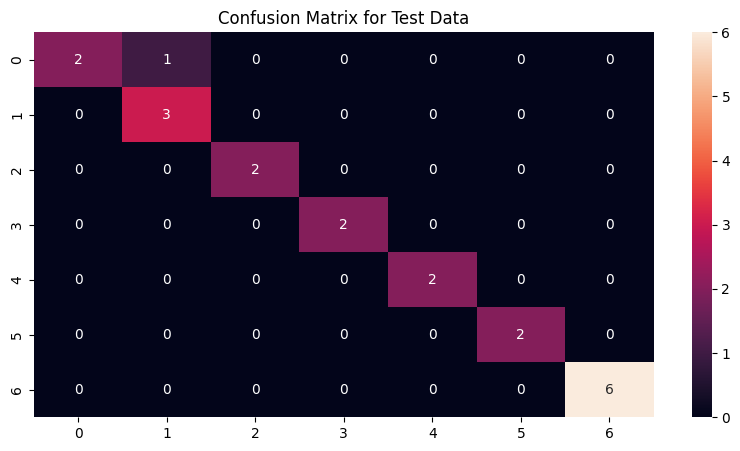

In [ ]:
from sklearn.svm import SVC

# Define the SVM models with different kernels
kernels = ['linear', 'poly', 'rbf']
accuracies = []
SVM_models = []

# Assuming Xtrain, Xtest, Ytrain, and Ytest are defined

for kernel in kernels:
    if kernel == 'poly':
        SVM = SVC(kernel=kernel, gamma='auto', degree=3)  # Poly kernel with degree 3
    else:
        SVM = SVC(kernel=kernel, gamma='auto')  # Linear or Gaussian (rbf) kernel

    # Train the SVM model
    SVM.fit(Xtrain, Ytrain)

    # Predict on the test set
    predicted_values = SVM.predict(Xtest)

    # Calculate accuracy using cross-validation
    score = cross_val_score(SVM, Xtrain, Ytrain, cv=5)
    mean_score = np.mean(score)
    accuracies.append(mean_score)
    SVM_models.append('SVM with ' + kernel + ' kernel')
    print("SVM with", kernel, "kernel's Accuracy is:", mean_score)

# Compare results
for i in range(len(SVM_models)):
    print(SVM_models[i] + "'s Accuracy:", accuracies[i])

# Append the best accuracy to acc and model list
max_acc = max(accuracies)
acc.append(max_acc)
model.append('SVM')

# Train the SVM model with linear kernel
SVM = SVC(kernel='linear', gamma='auto')
SVM.fit(Xtrain, Ytrain)
predicted_values = SVM.predict(Xtest)

# Calculate accuracy
accuracy = accuracy_score(Ytest, predicted_values)

# Calculate precision
precision = precision_score(Ytest, predicted_values, average='macro')

# Calculate recall
recall = recall_score(Ytest, predicted_values, average='macro')

# Calculate F1 score
f1 = f1_score(Ytest, predicted_values, average='macro')

print("\nOverall Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\n")
# Plot the confusion matrix
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix(Ytest, predicted_values), annot=True)
plt.title("Confusion Matrix for Test Data")
plt.show()



## <h1> Logistic Regression </h1>

In [ ]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)
LogReg.fit(Xtrain,Ytrain)
predicted_values = LogReg.predict(Xtest)

# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,x,y,cv=5)
score_mean = np.mean(score)
acc.append(score_mean)
model.append('Logistic Regression')

#calculate accuracy
accuracy = accuracy_score(Ytest, predicted_values)

# Calculate precision
precision = precision_score(Ytest, predicted_values, average='macro')

# Calculate recall
recall = recall_score(Ytest, predicted_values, average='macro')

# Calculate F1 score
f1 = f1_score(Ytest, predicted_values, average='macro')



print("Overall Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



Overall Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


## <h1> Random Forest </h1>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

# Cross validation score (Random Forest)
score = cross_val_score(RF,x,y,cv=5)
score_mean = np.mean(score)
acc.append(score_mean)
model.append('RF')


#calculate accuracy
accuracy = accuracy_score(Ytest, predicted_values)

# Calculate precision
precision = precision_score(Ytest, predicted_values, average='macro')

# Calculate recall
recall = recall_score(Ytest, predicted_values, average='macro')

# Calculate F1 score
f1 = f1_score(Ytest, predicted_values, average='macro')



print("Overall Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



Overall Accuracy: 0.85
Precision: 0.8714285714285713
Recall: 0.8333333333333333
F1 Score: 0.8214285714285714


## <h1> Accuracy Comparison </h1>

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

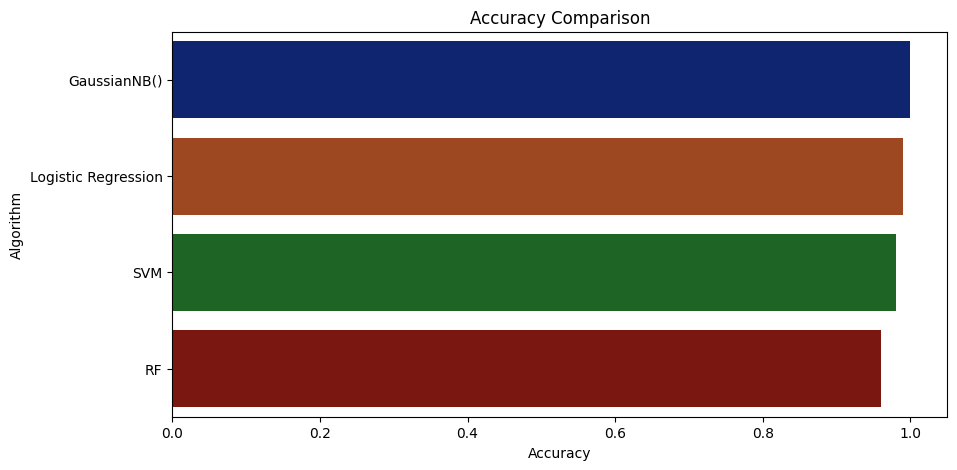

In [ ]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [ ]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

GaussianNB() --> 1.0
Logistic Regression --> 0.99
SVM --> 0.9800000000000001
RF --> 0.96


<h1> Making a prediction </h1>

In [ ]:
# Define the mapping dictionary for decoding
encoded_to_original = {
    0: '10-26-26',
    1: '14-35-14',
    2: '17-17-17',
    3: '20-20',
    4: '28-28',
    5: 'DAP',
    6: 'Urea'
}

# Suppose you have an encoded label
encoded_label = 6

# Decode the fertilizer label
decoded_fertilizer = encoded_to_original.get(encoded_label)

print("Decoded Fertilizer:", decoded_fertilizer)


Decoded Fertilizer: Urea


In [ ]:
temprature = 27.333
humidity = 53.333
moisture = 46.667
soil_type =0
crop_type=3
N = 37.333
K = 0
P =0

data = np.array([[temprature,humidity,moisture,soil_type,crop_type,N,K,P]])


# Predict outputs for selected data using each model
knn_output = knn.predict(data)
logreg_output = LogReg.predict(data)
rf_output = RF.predict(data)
nb_output = NaiveBayes.predict(data)
dt_output = DecisionTree.predict(data)
svm_output = SVM.predict(data)

# Print outputs
print("KNN:",encoded_to_original.get(knn_output[0]) )
print("Logistic Regression Output:",encoded_to_original.get(logreg_output[0]) )
print("Random Forest Output:",encoded_to_original.get(rf_output[0]) )
print("Naive Bayes Output:",encoded_to_original.get(nb_output[0]) )
print("Decision Tree Output:",encoded_to_original.get(dt_output[0]) )
print("SVM Output:",encoded_to_original.get(svm_output[0]) )

KNN: Urea
Logistic Regression Output: Urea
Random Forest Output: Urea
Naive Bayes Output: Urea
Decision Tree Output: Urea
SVM Output: Urea
